In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os,sys
import scipy.io as sc
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
import time
from IPython.display import clear_output
import math
import tensorflow_probability as tfp

In [330]:
import pandas as pd
def dataset(dataFile, labelFile):
    dataFile = "./communication/" + dataFile
    labelFile = "./communication/" + labelFile
    my_data = sc.loadmat(dataFile)
    my_labels = sc.loadmat(labelFile)
    my_data = my_data['Y']
    X = my_labels['L_S_x'].T
    cons = my_labels['L_Constellations'][0]
    data = table_data(my_data)
    label = assign_labels(X, cons)
    return data, label

def assign_labels(X, cons):
    for i in range(len(cons)):
        if cons[i] == 2:
            X[i] = X[i] + 4
    X = X-1
    return X

def table_data(my_data):
    data = np.dstack([my_data.real.T, my_data.imag.T])
    return data

In [264]:
data1 = "hard"
data1_label = "hard_label"
data, label = dataset(data1, data1_label)

In [331]:
data, label = dataset(data1, data1_label)

In [311]:
cons = my_labels['L_Constellations'][0]
block = my_data.shape[1]
cons_array = np.array([[[cons[i]]* my_data.shape[0]] for i in range(0, block)])

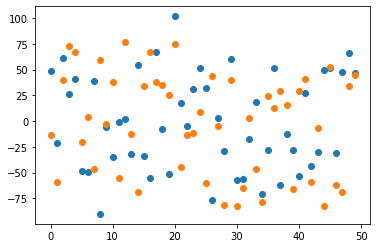

In [338]:
plt.plot(data[0, :, :], 'o')

In [3]:
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

NameError: name 'generator_optimizer' is not defined

In [332]:
data.shape

(1000, 50, 2)

In [329]:
data.reshape(1000,50,2)

array([[[ 4.88069804e+01, -1.38047710e+01],
        [ 6.71483962e+01, -1.02668633e+02],
        [ 3.61313419e+00,  6.47288656e+01],
        ...,
        [-3.91978202e+01, -3.65462042e+00],
        [ 2.85891355e+01, -2.86937817e+01],
        [-1.10094933e+01, -1.00750859e+01]],

       [[-2.26959501e+01, -5.91432267e+01],
        [ 4.20445239e+01, -6.91080281e+01],
        [-3.04452056e+00, -5.29737400e+01],
        ...,
        [-3.69911219e+01, -5.11516944e+01],
        [-2.54965494e+01, -5.75368974e+01],
        [ 5.89303837e+01, -4.85285582e+01]],

       [[-7.71884136e+00,  4.31313124e+01],
        [-2.18247936e-02,  3.36997758e+01],
        [ 7.30847235e+01,  3.80559869e+01],
        ...,
        [ 7.16678457e+01, -6.60859289e+01],
        [ 5.19718359e+01,  8.48711796e+01],
        [ 6.23522898e+01, -4.36484121e+01]],

       ...,

       [[-2.42642461e+01, -2.39191544e+01],
        [ 4.17108854e+01, -4.65744793e+01],
        [ 2.74474274e+00, -4.35015484e+01],
        ...,
     

In [26]:
def classifier(blockSize):
    input_shape = (blockSize, 2, 1)
    c_input = keras.layers.Input(shape=input_shape)
    cn_1 = layers.Conv2D(64, (2, 1), padding='same')(c_input)
    bn_1 = layers.BatchNormalization()(cn_1)
    act_1 = layers.LeakyReLU()(bn_1)
    dr_1 = layers.Dropout(0.3)(act_1)
    cn_2 = layers.Conv2D(128, (2, 1), padding='same')(dr_1)
    bn_2 = layers.BatchNormalization()(cn_2)
    act_2 = layers.LeakyReLU()(bn_2)
    dr_2 = layers.Dropout(0.3)(act_2)
    clf_out = keras.layers.Dense(2, activation="softmax")(dr_2)
    mu = keras.layers.Dense(1)(dr_2)
    sigma = keras.layers.Dense(1, activation=lambda x: tf.math.exp(x))(dr_2)
    model = keras.models.Model(inputs = c_input, outputs = [clf_out, mu, sigma])
    return model

In [27]:
test = classifier(50)

In [30]:
g_noise = tf.random.normal([256, 50, 3, 1])

In [29]:
test, mu, sigma = test(g_noise)

In [31]:
dist = tfp.distributions.Normal(loc=mu, scale=sigma)
c_1_loss = tf.reduce_mean(-dist.log_prob(g_noise))

InvalidArgumentError: Incompatible shapes: [256,50,3,1] vs. [256,50,2,1] [Op:RealDiv]

In [19]:
c_1_loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.3744234>